### Mulit-ouput mulitclass tarining with transformers model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Hamoye/Team_algorithm/cve_merged.csv")
df.head()

,cve_id,mod_date,pub_date,cvss,cwe_code,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity,vendor,vulnerable_product,Pub_Year,Mod_Year,Qualitative_cvss
0,CVE-2019-2211,2019-11-14 21:36:00,2019-11-13 18:15:00,7.8,89,Improper Neutralization of Special Elements u...,In createProjectionMapForQuery of TvProvider.j...,NONE,LOW,NETWORK,NONE,COMPLETE,NONE,google,android,2019,2019,High
1,CVE-2019-2212,2019-11-14 21:30:00,2019-11-13 18:15:00,4.9,200,Information Exposure,"In poisson_distribution of random, there is an...",NONE,LOW,LOCAL,NONE,COMPLETE,NONE,google,android,2019,2019,Medium
2,CVE-2019-2213,2019-11-14 21:24:00,2019-11-13 18:15:00,6.9,416,Use After Free,"In binder_free_transaction of binder.c, there ...",NONE,MEDIUM,LOCAL,COMPLETE,COMPLETE,COMPLETE,google,android,2019,2019,Medium
3,CVE-2019-2214,2019-11-14 21:19:00,2019-11-13 18:15:00,7.2,269,Improper Privilege Management,"In binder_transaction of binder.c, there is a ...",NONE,LOW,LOCAL,COMPLETE,COMPLETE,COMPLETE,google,android,2019,2019,High
4,CVE-2019-18793,2019-11-14 21:14:00,2019-11-13 20:15:00,4.3,79,Improper Neutralization of Input During Web P...,Parallels Plesk Panel 9.5 allows XSS in target...,NONE,MEDIUM,NETWORK,NONE,NONE,PARTIAL,parallels,parallels_plesk_panel,2019,2019,Medium


In [ ]:
df.isnull().sum()

cve_id                    0
mod_date                  0
pub_date                  0
cvss                      0
cwe_code                  0
cwe_name                  0
summary                   0
access_authentication     0
access_complexity         0
access_vector             0
impact_availability       0
impact_confidentiality    0
impact_integrity          0
vendor                    0
vulnerable_product        0
Pub_Year                  0
Mod_Year                  0
Qualitative_cvss          0
dtype: int64

In [5]:
selected_columns = df.columns[5:13]
df = df.loc[:,selected_columns]
df.head()


,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,Improper Neutralization of Special Elements u...,In createProjectionMapForQuery of TvProvider.j...,NONE,LOW,NETWORK,NONE,COMPLETE,NONE
1,Information Exposure,"In poisson_distribution of random, there is an...",NONE,LOW,LOCAL,NONE,COMPLETE,NONE
2,Use After Free,"In binder_free_transaction of binder.c, there ...",NONE,MEDIUM,LOCAL,COMPLETE,COMPLETE,COMPLETE
3,Improper Privilege Management,"In binder_transaction of binder.c, there is a ...",NONE,LOW,LOCAL,COMPLETE,COMPLETE,COMPLETE
4,Improper Neutralization of Input During Web P...,Parallels Plesk Panel 9.5 allows XSS in target...,NONE,MEDIUM,NETWORK,NONE,NONE,PARTIAL


In [6]:
#Drop duplicates and reset index
df.drop_duplicates(keep=False, inplace=True)
df.reset_index(inplace=True,drop=True)

In [7]:
df["summary"] = df["summary"].apply(lambda x : x.replace("_"," "))

In [8]:
#Join weakness and summary of vulnerability
def join_text(cols):
     cwe = cols[0]
     summary = cols[1]
     return cwe + " " + summary
df["cwe_summary"] =  df[["cwe_name","summary"]].apply(join_text,axis=1)


_________________________________________________

_________________________________________________

_________________________________________________

_________________________________________________

_________________________________________________

_________________________________________________


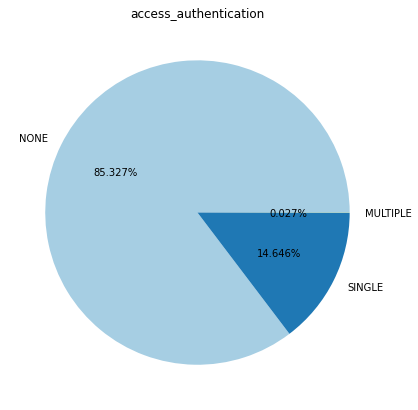

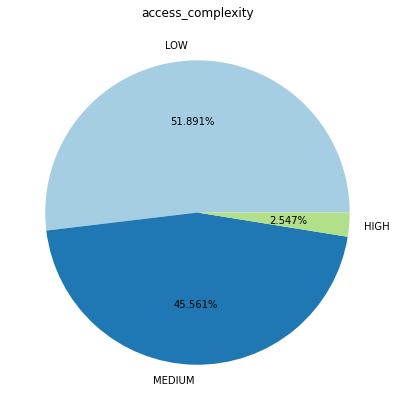

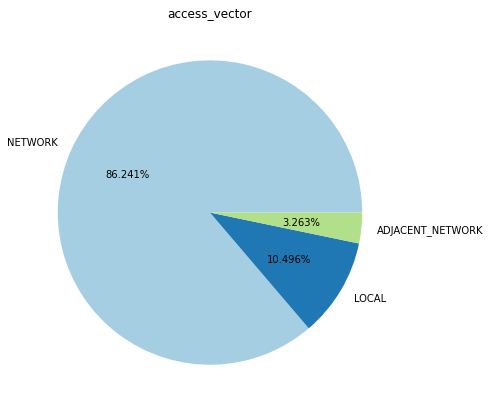

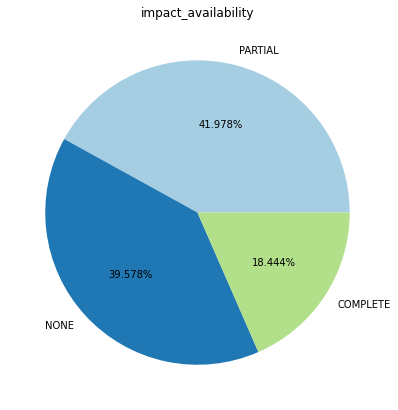

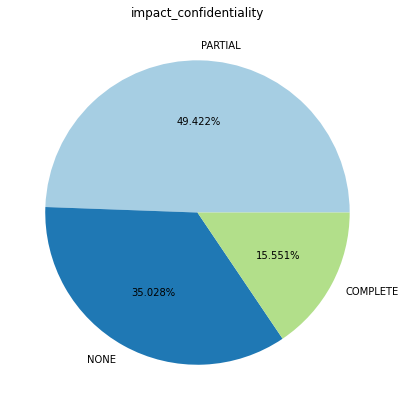

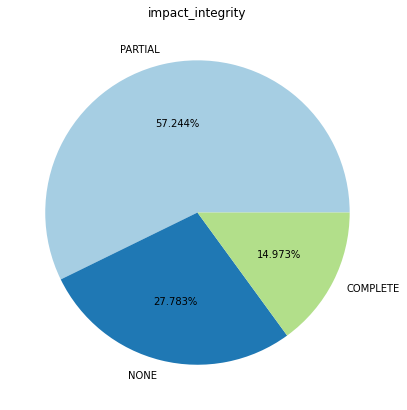

In [ ]:
#Plot distribution of target column
target_cols = ['access_authentication', 'access_complexity','access_vector', 'impact_availability', 'impact_confidentiality','impact_integrity']
for feature in target_cols:
    plt.figure(figsize=(10,7))
    data =df[feature].value_counts().values
    labels = df[feature].value_counts().index

    #Read in Seaborn color palette
    plt.title(feature)
    colors = sns.color_palette('Paired')[0:4]

    #Create pie chart with Matplotlib
    plt.pie(data, labels = labels, colors = colors, autopct='%1.3f%%')
    print()
    print("_________________________________________________")

In [1]:
# Or install with a specific Version
!pip install -U "tensorflow==2.8.*"
!pip install -U "tensorflow-text==2.8.*"


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 497.9 MB 34 kB/s 
     |████████████████████████████████| 462 kB 75.5 MB/s 
     |████████████████████████████████| 5.8 MB 55.3 MB/s 
     |████████████████████████████████| 1.4 MB 67.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully un

In [12]:
import tensorflow as tf
import tensorflow_text as text
import tensorflow_hub as hub

In [11]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [12]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up", 
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.84351724, -0.51327276, -0.88845724, ..., -0.74748844,
        -0.7531474 ,  0.91964495],
       [-0.87208337, -0.5054394 , -0.94446665, ..., -0.85847497,
        -0.71745324,  0.8808295 ]], dtype=float32)>

**Training with BERT**

In [17]:
import keras.backend as K
from keras.callbacks import Callback,ModelCheckpoint,EarlyStopping
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [21]:
#Define other metrics if needed
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy')
     

]

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
#access_authentication prediction
auth = tf.keras.layers.Dense(3, activation='softmax', name="access_authentication")(l)
#access_complexity prediction
comp = tf.keras.layers.Dense(3, activation='softmax', name="access_complexity")(l)
#access_vector
vector = tf.keras.layers.Dense(3, activation='softmax', name="access_vector")(l)
#impact_availability
availa = tf.keras.layers.Dense(3, activation='softmax', name="impact_availability")(l)
#impact_confidentiality
conf = tf.keras.layers.Dense(3, activation='softmax', name="impact_confidentiality")(l)
#impact_integrity
integ = tf.keras.layers.Dense(3, activation='softmax', name="impact_integrity")(l)


# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [auth,comp,vector,availa,conf,integ])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [ ]:

#Compile model
model.compile(optimizer="adam",loss={"access_authentication":"categorical_crossentropy","access_complexity":"categorical_crossentropy","access_vector":"categorical_crossentropy","impact_availability":"categorical_crossentropy","impact_confidentiality":"categorical_crossentropy","impact_integrity":"categorical_crossentropy"},metrics=[get_f1])
              

In [56]:
#Define one hot encoded values of each target varaiable
#access_authentication
y1 = df["access_authentication"]
y1 = pd.get_dummies(y1).values

#access_complexity
y2 = df["access_complexity"]
y2 = pd.get_dummies(y2).values

#access_vector
y3 = df["access_vector"]
y3 = pd.get_dummies(y3).values

#impact_availability
y4 = df["impact_availability"]
y4 = pd.get_dummies(y4).values

#impact_availability
y5 = df["impact_confidentiality"]
y5 = pd.get_dummies(y5).values

#impact_integrity
y6 = df["impact_integrity"]
y6 = pd.get_dummies(y6).values


In [60]:
yy6 = pd.get_dummies(df["impact_confidentiality"])
yy6

,COMPLETE,NONE,PARTIAL
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
65632,1,0,0
65633,0,0,1
65634,1,0,0
65635,0,1,0


In [ ]:
history_1 = model.fit(df["summary"],{'access_authentication':y1, 'access_complexity':y2,"access_vector":y3,"impact_availability":y4,"impact_confidentiality":y5,"impact_integrity":y6},
                 validation_split=0.1, 
                       epochs=10, 
                            batch_size=64)

Epoch 1/10
924/924 [==============================] - 752s 798ms/step - loss: 4.3144 - access_authentication_loss: 0.4074 - access_complexity_loss: 0.7503 - access_vector_loss: 0.3948 - impact_availability_loss: 0.9591 - impact_confidentiality_loss: 0.9340 - impact_integrity_loss: 0.8689 - access_authentication_get_f1: 0.8475 - access_complexity_get_f1: 0.5826 - access_vector_get_f1: 0.8706 - impact_availability_get_f1: 0.3881 - impact_confidentiality_get_f1: 0.4605 - impact_integrity_get_f1: 0.5540 - val_loss: 3.9900 - val_access_authentication_loss: 0.2948 - val_access_complexity_loss: 0.7998 - val_access_vector_loss: 0.3308 - val_impact_availability_loss: 0.9034 - val_impact_confidentiality_loss: 0.8716 - val_impact_integrity_loss: 0.7896 - val_access_authentication_get_f1: 0.8936 - val_access_complexity_get_f1: 0.6509 - val_access_vector_get_f1: 0.8681 - val_impact_availability_get_f1: 0.4668 - val_impact_confidentiality_get_f1: 0.5266 - val_impact_integrity_get_f1: 0.5957
Epoch 2/

Comment:The score of access vector and and access authentication look pretty ,the models will be separated into two since the performance on other variables can be improved by increasing the number of epochs as the loss functions keep decreasing 

In [ ]:
model.predict(["SQL injection doing server making"])

[array([[3.5887469e-06, 4.2786902e-01, 5.7212740e-01]], dtype=float32),
 array([[1.9082610e-04, 8.7195677e-01, 1.2785237e-01]], dtype=float32),
 array([[9.3222261e-06, 8.2499819e-04, 9.9916565e-01]], dtype=float32),
 array([[0.00509878, 0.79597026, 0.19893096]], dtype=float32),
 array([[0.00461981, 0.8556556 , 0.13972461]], dtype=float32),
 array([[0.00305297, 0.04891909, 0.9480279 ]], dtype=float32)]

In [ ]:
#Save model 
import os 
os.chdir("/content/drive/MyDrive/HamoyeInternship/Team_Algorithm")
from keras.models import load_model
model.save('bert_multi_ouput.h5')

**Training a single model for access vector and authentication**

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
#access_authentication prediction
auth = tf.keras.layers.Dense(3, activation='softmax', name="access_authentication")(l)
#access_vector
vector = tf.keras.layers.Dense(3, activation='softmax', name="access_vector")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [auth,vector])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [ ]:

#Compile model
model.compile(optimizer="adam",loss={"access_authentication":"categorical_crossentropy","access_vector":"categorical_crossentropy"},metrics=METRICS)
              

In [ ]:
from keras import callbacks
es = EarlyStopping(monitor='val_loss',patience=2,verbose=1)
history_1 = model.fit(df["summary"],{'access_authentication':y1,"access_vector":y3},
                 validation_split=0.1, 
                       epochs=5, 
                            batch_size=64,callbacks=es)

Epoch 1/5
924/924 [==============================] - 710s 759ms/step - loss: 0.7935 - access_authentication_loss: 0.4084 - access_vector_loss: 0.3851 - access_authentication_accuracy: 0.8986 - access_authentication_f1_score: 0.8480 - access_vector_accuracy: 0.9165 - access_vector_f1_score: 0.8746 - val_loss: 0.6382 - val_access_authentication_loss: 0.3013 - val_access_vector_loss: 0.3369 - val_access_authentication_accuracy: 0.9293 - val_access_authentication_f1_score: 0.8942 - val_access_vector_accuracy: 0.9112 - val_access_vector_f1_score: 0.8672
Epoch 2/5
924/924 [==============================] - 707s 765ms/step - loss: 0.7139 - access_authentication_loss: 0.3798 - access_vector_loss: 0.3341 - access_authentication_accuracy: 0.8997 - access_authentication_f1_score: 0.8497 - access_vector_accuracy: 0.9243 - access_vector_f1_score: 0.8863 - val_loss: 0.5807 - val_access_authentication_loss: 0.2839 - val_access_vector_loss: 0.2968 - val_access_authentication_accuracy: 0.9288 - val_acc

In [ ]:
import os 
os.chdir("/content/drive/MyDrive/Hamoye Internship/Team_algorithm")
from keras.models import load_model
model.save('bert_auth_vector.h5') 

**Training a single model for impact availability,acess complexity,impact confidentiality and impact integrity**

In [16]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
#access_complexity prediction
comp = tf.keras.layers.Dense(3, activation='softmax', name="access_complexity")(l)
#access_vector
availa = tf.keras.layers.Dense(3, activation='softmax', name="impact_availability")(l)
#impact_confidentiality
conf = tf.keras.layers.Dense(3, activation='softmax', name="impact_confidentiality")(l)
#impact_integrity
integ = tf.keras.layers.Dense(3, activation='softmax', name="impact_integrity")(l)


# Use inputs and outputs to construct a final model
model_2 = tf.keras.Model(inputs=[text_input], outputs = [comp,availa,conf,integ])
model_2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [17]:
model_2.compile(optimizer="adam",loss={"access_complexity":"categorical_crossentropy","impact_availability":"categorical_crossentropy","impact_confidentiality":"categorical_crossentropy","impact_integrity":"categorical_crossentropy"},metrics=METRICS)

In [19]:
from keras import callbacks
es = EarlyStopping(monitor='val_loss',patience=2,verbose=1)
history_2 = model_2.fit(df["summary"],{'access_complexity':y2,"impact_availability":y4,"impact_confidentiality":y5,"impact_integrity":y6},
                 validation_split=0.1, 
                       epochs=20, 
                            batch_size=64,callbacks=es)

Epoch 1/20
924/924 [==============================] - 771s 825ms/step - loss: 3.5211 - access_complexity_loss: 0.7502 - impact_availability_loss: 0.9621 - impact_confidentiality_loss: 0.9388 - impact_integrity_loss: 0.8700 - access_complexity_accuracy: 0.7323 - access_complexity_f1_score: 0.5858 - impact_availability_accuracy: 0.6943 - impact_availability_f1_score: 0.3840 - impact_confidentiality_accuracy: 0.7058 - impact_confidentiality_f1_score: 0.4537 - impact_integrity_accuracy: 0.7455 - impact_integrity_f1_score: 0.5511 - val_loss: 3.5160 - val_access_complexity_loss: 0.7936 - val_impact_availability_loss: 0.9464 - val_impact_confidentiality_loss: 0.9489 - val_impact_integrity_loss: 0.8269 - val_access_complexity_accuracy: 0.7754 - val_access_complexity_f1_score: 0.6597 - val_impact_availability_accuracy: 0.7133 - val_impact_availability_f1_score: 0.5020 - val_impact_confidentiality_accuracy: 0.6865 - val_impact_confidentiality_f1_score: 0.5067 - val_impact_integrity_accuracy: 0.7

In [10]:
import os 
os.chdir("/content/drive/MyDrive/Hamoye/Team_algorithm")
from tf.keras.models import load_model
model_2.save('bert_other_metric_comp_avia_conf_integ.h5')   

ModuleNotFoundError: ignored

 **Load trained models**

In [27]:
#Load access authentication and access vector model
from tensorflow.keras.models import load_model
path = "/content/drive/MyDrive/Hamoye/Team_algorithm/bert_auth_vector.h5"
model_1 = load_model(
       (path),
       custom_objects={'KerasLayer':hub.KerasLayer,"f1_score":f1_score})

In [23]:
from tensorflow.keras.models import load_model
path = "/content/drive/MyDrive/Hamoye/Team_algorithm/bert_other_metric_comp_avia_conf_integ.h5"
model_2 = load_model(
       (path),
       custom_objects={'KerasLayer':hub.KerasLayer,"f1_score":f1_score}
)

In [28]:
##For a dictionary of target varibale with the unique values folliwng the exact order they will be one-hot encoded
target_dic = {}
cols = ['access_authentication', 'access_vector','access_complexity','impact_availability', 'impact_confidentiality', 'impact_integrity']
for feature in cols:
      test_values = pd.get_dummies(df[feature]).columns
        
      target_dic[feature] = test_values

In [29]:
target_dic

{'access_authentication': Index(['MULTIPLE', 'NONE', 'SINGLE'], dtype='object'),
 'access_vector': Index(['ADJACENT_NETWORK', 'LOCAL', 'NETWORK'], dtype='object'),
 'access_complexity': Index(['HIGH', 'LOW', 'MEDIUM'], dtype='object'),
 'impact_availability': Index(['COMPLETE', 'NONE', 'PARTIAL'], dtype='object'),
 'impact_confidentiality': Index(['COMPLETE', 'NONE', 'PARTIAL'], dtype='object'),
 'impact_integrity': Index(['COMPLETE', 'NONE', 'PARTIAL'], dtype='object')}

In [74]:
df.head()

,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity,cwe_summary
0,Improper Neutralization of Special Elements u...,In createProjectionMapForQuery of TvProvider.j...,NONE,LOW,NETWORK,NONE,COMPLETE,NONE,Improper Neutralization of Special Elements u...
1,Information Exposure,"In poisson distribution of random, there is an...",NONE,LOW,LOCAL,NONE,COMPLETE,NONE,Information Exposure In poisson distribution ...
2,Use After Free,"In binder free transaction of binder.c, there ...",NONE,MEDIUM,LOCAL,COMPLETE,COMPLETE,COMPLETE,Use After Free In binder free transaction of ...
3,Improper Privilege Management,"In binder transaction of binder.c, there is a ...",NONE,LOW,LOCAL,COMPLETE,COMPLETE,COMPLETE,Improper Privilege Management In binder trans...
4,Improper Neutralization of Input During Web P...,Parallels Plesk Panel 9.5 allows XSS in target...,NONE,MEDIUM,NETWORK,NONE,NONE,PARTIAL,Improper Neutralization of Input During Web P...


In [70]:
preds =  model_1.predict([df["summary"][4]])

In [71]:
preds

[array([[3.6713478e-04, 7.4856329e-01, 2.5106966e-01]], dtype=float32),
 array([[0.00183186, 0.08364692, 0.9145212 ]], dtype=float32)]

**Custom predict function**

In [100]:
def predict(input_):
  input_text = [input_]
  preds1 =  model_1.predict(input_text)
  preds2 = model_2.predict(input_text)
  class_index= []
  for i in  preds1:
    index = np.argmax(i)
    class_index.append(index)
  for i in  preds2:
    index_n = np.argmax(i)
    class_index.append(index_n)
  target_array = list(target_dic.values())
  targets = []
  for i,j in zip(target_array,class_index):
    val = i[j]
    targets.append(val)
  prediction = {}
  for feature,label in zip(list(target_dic.keys()),targets):
    prediction[feature] = label
  return prediction

  

predicted = predict(df["summary"][1298])



In [101]:
predicted

{'access_authentication': 'NONE',
 'access_vector': 'NETWORK',
 'access_complexity': 'MEDIUM',
 'impact_availability': 'PARTIAL',
 'impact_confidentiality': 'NONE',
 'impact_integrity': 'PARTIAL'}